In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from statsmodels.graphics.gofplots import ProbPlot

In [44]:
df = datasets.load_boston(return_X_y=False)

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [59]:
x = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.DataFrame(df.target, columns=['price'])

In [46]:
y.shape

(506, 1)

In [16]:
df_test = pd.concat((y, x), axis=1)

In [17]:
correlations = df_test.corr()
correlations.style.background_gradient(cmap='Greens')

,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
price,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
x_train.shape, y_train.shape

((354, 13), (354, 1))

In [19]:
ml = sm.OLS(y_train, sm.add_constant(x_train))
ml_results = ml.fit()

In [55]:
ml_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           4.96e-92
Time:                        18:18:10   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.000      19.720      43.542
CRIM          -0.1335      0.041     -3.271      0.001      -0.214      -0.053
ZN             0.0358      0.018      2.029      0.043       0.001       0.071
INDUS          0.0495      0.073      0.680      0.497      -0.094       0.193
CHAS           3.1198      1.037      3.010      0.003       1.081       5.159
NOX          -15.4171      4.750     -3.246      0.001     -24.759      -6.075
RM             4.0572      0.496      8.181      0.000       3.082       5.033
AGE           -0.0108      0.016     -0.671      0.503      -0.043       0.021
DIS           -1.3860      0.242     -5.734      0.000      -1.861      -0.911
RAD            0.2427      0.082      2.963      0.003       0.082       0.404
TAX           -0.0087      0.005     -1.886      0.060      -0.018       0.000
PTRATIO       -0.9107      0.154     -5.905      0.000      -1.214      -0.607
B              0.0118      0.003      3.534      0.000       0.005       0.018
LSTAT         -0.5471      0.059     -9.219      0.000      -0.664      -0.430
==============================================================================
Omnibus:                      115.779   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.270
Skew:                           1.381   Prob(JB):                    3.08e-100
Kurtosis:                       7.842   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model_fitted_y = ml_results.fittedvalues
model_residuals = ml_results.resid
model_norm_residuals = ml_results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = ml_results.get_influence().hat_matrix_diag
model_cooks = ml_results.get_influence().cooks_distance[0]

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


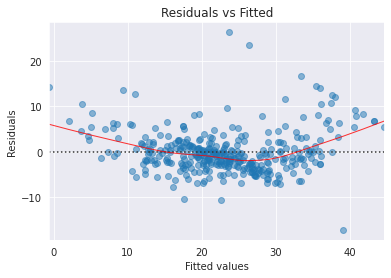

In [49]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_train,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


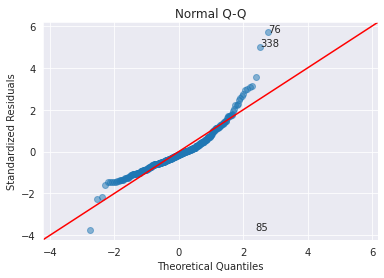

In [51]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));


/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 76

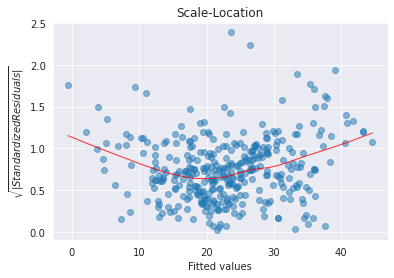

In [52]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(model_fitted_y[i],
                                   model_norm_residuals_abs_sqrt[i]));



/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


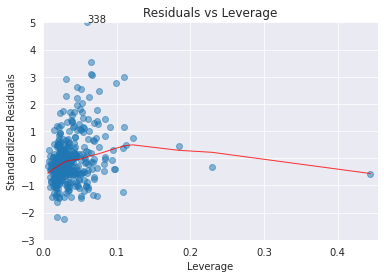

In [53]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                               xy=(model_leverage[i],
                                   model_norm_residuals[i]));


##### Modelo entrenado sin las columnas INDUS y AGE

In [173]:
x_alt1 = x.copy()
#x_alt1 = x_alt1.drop(columns=['INDUS', 'AGE', 'TAX', 'ZN', 'CHAS', 'DIS', 'NOX', 'B', 'RAD', 'CRIM', 'PTRATIO'])
x_alt1 = x_alt1.drop(columns=['INDUS', 'AGE'])
x_alt1.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


In [174]:
x_alt1.LSTAT = x_alt1.LSTAT ** 0.5
x_alt1.RM = x_alt1.RM ** 0.5

In [175]:
x_train_alt1, x_test_alt1, y_train_alt1, y_test_alt1 = train_test_split(x_alt1, y, test_size=0.3, random_state=42)

In [176]:
ml_alt1 = sm.OLS(y_train_alt1, sm.add_constant(x_train_alt1))
ml_results_alt1 = ml_alt1.fit()
residuals_alt1 = ml_results_alt1.resid
ml_results_alt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.58e-101
Time:                        12:19:19   Log-Likelihood:                -1036.1
No. Observations:                 354   AIC:                             2096.
Df Residuals:                     342   BIC:                             2143.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4498      8.427      3.495      0.001      12.874      46.025
CRIM          -0.1343      0.039     -3.479      0.001      -0.210      -0.058
ZN             0.0292      0.016      1.784      0.075      -0.003       0.061
CHAS           2.8390      0.978      2.901      0.004       0.914       4.764
NOX          -12.8613      4.165     -3.088      0.002     -21.053      -4.669
RM            14.4621      2.378      6.081      0.000       9.784      19.140
DIS           -1.3689      0.216     -6.350      0.000      -1.793      -0.945
RAD            0.2458      0.074      3.304      0.001       0.099       0.392
TAX           -0.0079      0.004     -1.990      0.047      -0.016   -9.17e-05
PTRATIO       -0.8699      0.145     -5.992      0.000      -1.155      -0.584
B              0.0103      0.003      3.260      0.001       0.004       0.017
LSTAT         -5.1464      0.409    -12.593      0.000      -5.950      -4.343
==============================================================================
Omnibus:                       85.783   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.019
Skew:                           1.106   Prob(JB):                     8.44e-55
Kurtosis:                       6.463   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
model_fitted_y = ml_results_alt1.fittedvalues
model_residuals = ml_results_alt1.resid
model_norm_residuals = ml_results_alt1.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = ml_results_alt1.get_influence().hat_matrix_diag
model_cooks = ml_results_alt1.get_influence().cooks_distance[0]

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


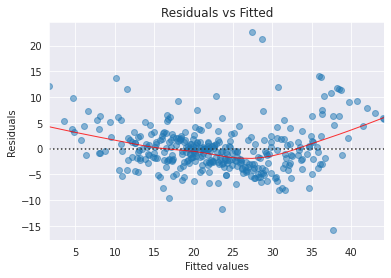

In [178]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_train,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


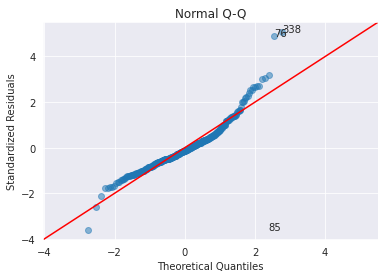

In [179]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));